<h1>PROJET : ANALYSE DES DONNÉES DU COVID-19 (2020)</h1>

<h2>voici les questions aux quelles nous devrons repondre dans le cadre de notre travail:</h2>
<ul>
<li>quels sont les pays avec le plus grand nombres de cas?</li>
<li>quels sont les pays avec un taux de mortalité élevé?</li>
<li>faire une evaluation comparative des situations de chaque continents</li>
<li>comment evalue le nombre de deces et de cas dans chaque pays dans l'année? </li>
<li>y'a t'il une relation directe entre la population d'un pays et le nombre de cas recensé?</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("COVID-19-geographic-disbtribution-worldwide-2020-12-14-_2_.csv")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,1212122020年12月14日,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,1212122020年12月13日,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,1212122020年12月12日,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,1212122020年12月11日,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,1212122020年12月10日,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [3]:
data.shape

(61900, 12)

<p>Notre dataset a donc 61900 lignes pour 12 colonnes</p>

In [4]:
print(data["countriesAndTerritories"].value_counts())
print(data["continentExp"].value_counts())

countriesAndTerritories
South_Korea                                   350
Sweden                                        350
China                                         350
Mexico                                        350
Canada                                        350
                                             ... 
Cases_on_an_international_conveyance_Japan     64
Solomon_Islands                                60
Wallis_and_Futuna                              59
Marshall_Islands                               47
Vanuatu                                        34
Name: count, Length: 214, dtype: int64
continentExp
Europe     17372
Africa     14981
America    13742
Asia       13241
Oceania     2500
Other         64
Name: count, dtype: int64


nous avons donc 214 pays et 6 continents

In [5]:
data.rename(columns={"Cumulative_number_for_14_days_of_COVID-19_cases_per_100000":"Cumulative"},inplace=True)

<p> verifions s'il y'a des <b>valeurs manquantes</b> et décomptons les.</p>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61900 non-null  object 
 1   day                      61900 non-null  int64  
 2   month                    61900 non-null  int64  
 3   year                     61900 non-null  int64  
 4   cases                    61900 non-null  int64  
 5   deaths                   61900 non-null  int64  
 6   countriesAndTerritories  61900 non-null  object 
 7   geoId                    61625 non-null  object 
 8   countryterritoryCode     61777 non-null  object 
 9   popData2019              61777 non-null  float64
 10  continentExp             61900 non-null  object 
 11  Cumulative               59021 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 5.7+ MB


In [7]:
np.sum(data.isnull())

dateRep                       0
day                           0
month                         0
year                          0
cases                         0
deaths                        0
countriesAndTerritories       0
geoId                       275
countryterritoryCode        123
popData2019                 123
continentExp                  0
Cumulative                 2879
dtype: int64

<p>On a donc des valeurs manquantes au niveau des colonnes:</p>
<ul>
<li>geoId (l'identifiant geaographique)</li>
<li>countryterritoryCode (le nom du pays ou de la région)</li>
<li>popData2019 (la population estimé en 2019)</li>
<li>Cumulative (le nombre de cas cumulé les 14 derniers jours pour 100000 habitants)</li>
</ul>

<h3>Gestion des valeurs manquantes</h3>

<p> Étant donner qu'ici,les donnees sont triées par ordre alphabétique de pays et par ordre chronologique, pour un remplacage efficace des valeurs manquantes on peut procéder a un <b>forward fill</b> pour chacune de ces colonnes.</p>

In [8]:
data["geoId"]= data["geoId"].fillna(method="ffill")

data["countryterritoryCode"]= data["countryterritoryCode"].fillna(method="ffill")

data["popData2019"]= data["popData2019"].fillna(method="ffill")

data["Cumulative"]= data["Cumulative"].fillna(method="ffill")

np.sum(data.isnull())

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2019                0
continentExp               0
Cumulative                 0
dtype: int64

In [9]:
data.sample(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative
25662,1212122020年9月3日,3,9,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.000000
29678,1212122020年4月29日,29,4,2020,17,0,Jamaica,JM,JAM,2948277.0,America,9.361400
28864,1212122020年8月24日,24,8,2020,1071,15,Israel,IL,ISR,8519373.0,Asia,236.508015
21097,1212122020年8月24日,24,8,2020,0,0,Gabon,GA,GAB,2172578.0,Africa,21.403144
36205,1212122020年8月26日,26,8,2020,46,0,Malta,MT,MLT,493559.0,Europe,135.343495
905,1212122020年2月29日,29,2,2020,0,0,Algeria,DZ,DZA,43053054.0,Africa,0.002323
50268,1212122020年5月27日,27,5,2020,19,2,Sierra_Leone,SL,SLE,7813207.0,Africa,5.324318
49682,1212122020年6月27日,27,6,2020,193,1,Serbia,RS,SRB,6963764.0,Europe,19.960470
16907,1212122020年9月6日,6,9,2020,870,50,Ecuador,EC,ECU,17373657.0,America,63.060989
48751,1212122020年10月22日,22,10,2020,2,0,Sao_Tome_and_Principe,ST,STP,215048.0,Africa,9.765262


<h4>Apres avoir traiter nos données, répondons aux questions suivantes</h4>
<ol>
    <li>quels sont les pays avec le plus grand nombres de cas?</li>
    <li>quels sont les pays avec un taux de mortalité élevé?</li>
</ol>

<p>Commencons par creer une liste contenant tous les pays.</p>

In [10]:
liste=data["countriesAndTerritories"]
liste=liste.drop_duplicates()
liste=np.array(liste)
liste

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

<p>Par la suite reduisons nous les colonnes <b>"cases"</b> et <b> "countriesAndTerritories"</b>

In [11]:
data2=data[["cases","countriesAndTerritories"]]
data2

,cases,countriesAndTerritories
0,746,Afghanistan
1,298,Afghanistan
2,113,Afghanistan
3,63,Afghanistan
4,202,Afghanistan
...,...,...
61895,0,Zimbabwe
61896,0,Zimbabwe
61897,0,Zimbabwe
61898,1,Zimbabwe


<p>Ensuite on creer deux listes <i>nb1</i>  et <i>nb2</i> que l'on remplit avec les sommes des <b>cas</b> et des <b>deces</b> enregistrer par pays.</p> 

In [12]:
nb1=[]
nb2=[]
for i in liste:
    condition=data2["countriesAndTerritories"]==i
    nombre1=np.sum(data[condition].cases)
    nombre2=np.sum(data[condition].deaths)
    nb1.append(nombre1)
    nb2.append(nombre2)

In [13]:
print(nb1)
print(nb2)

[49273, 48530, 92102, 7338, 16188, 10, 148, 1498160, 148682, 5049, 28031, 320036, 175874, 7674, 89143, 490533, 292, 160295, 608001, 9295, 3090, 431, 438, 147150, 173, 101117, 12501, 6901952, 76, 152, 179449, 4030, 729, 359, 25143, 460743, 11357, 696, 298, 4936, 1770, 571919, 92021, 1425774, 628, 6049, 150947, 21680, 175886, 9423, 3624, 15101, 581079, 14512, 109758, 5728, 87, 154692, 202110, 121575, 41880, 5185, 711, 18055, 6768, 116769, 19, 528, 46, 30810, 2376852, 15618, 9330, 3782, 191063, 1337078, 53014, 1075, 124534, 19, 69, 7106, 129282, 289, 13420, 2444, 5920, 9565, 26, 114359, 283870, 5557, 9884100, 617820, 1108269, 574634, 76185, 370, 357859, 1843712, 11710, 179653, 1779, 259614, 186277, 91892, 46580, 146218, 77674, 41, 25675, 146520, 2250, 1676, 90779, 1514, 95021, 41272, 17638, 6066, 83475, 13368, 5814, 11101, 4, 10780, 515, 1250044, 126518, 668, 912, 41426, 13, 399609, 16954, 108342, 16536, 248423, 612746, 36, 1740, 5887, 2258, 73175, 73638, 113, 40022, 126240, 440787, 12465

<p>On creer un nouveau DataFrame avec la liste des pays,nb1 et nb2. </p>

In [14]:
df={
    "noms_des_pays":liste,
    "nombres_de_cas":nb1,
    "nombres_de_morts":nb2
}

In [15]:
df=pd.DataFrame(df)
df

,noms_des_pays,nombres_de_cas,nombres_de_morts
0,Afghanistan,49273,1971
1,Albania,48530,1003
2,Algeria,92102,2596
3,Andorra,7338,79
4,Angola,16188,371
...,...,...,...
209,Wallis_and_Futuna,3,0
210,Western_Sahara,766,1
211,Yemen,2083,606
212,Zambia,18274,367


<p>On trie le nouveau DataFrame selon le nombre de cas et on affiche les 10 premieres lignes.</p>

In [16]:
df.sort_values("nombres_de_cas", ascending=False, inplace=True)
df.head(10)

,noms_des_pays,nombres_de_cas,nombres_de_morts
202,United_States_of_America,16256754,299177
92,India,9884100,143355
27,Brazil,6901952,181402
160,Russia,2653928,46941
70,France,2376852,57911
200,United_Kingdom,1849403,64170
99,Italy,1843712,64520
181,Spain,1730575,47624
7,Argentina,1498160,40766
43,Colombia,1425774,39053


<p>On a ainsi les 10 pays ayant été le plus touché par la pandémie et leur nombres de cas et de deces respectif</p>

On determine ensuite le taux de mortalité pour chaque pays

In [17]:
df["taux_de_mortalité"]=(df["nombres_de_morts"]/df["nombres_de_cas"])*100
df

,noms_des_pays,nombres_de_cas,nombres_de_morts,taux_de_mortalité
202,United_States_of_America,16256754,299177,1.840324
92,India,9884100,143355,1.450360
27,Brazil,6901952,181402,2.628271
160,Russia,2653928,46941,1.768737
70,France,2376852,57911,2.436458
...,...,...,...,...
132,Montserrat,13,1,7.692308
5,Anguilla,10,0,0.000000
124,Marshall_Islands,4,0,0.000000
209,Wallis_and_Futuna,3,0,0.000000


In [18]:
df.sort_values("taux_de_mortalité", ascending=False,inplace=True)

Apres trie on obtient

In [19]:
df.head(10)

,noms_des_pays,nombres_de_cas,nombres_de_morts,taux_de_mortalité
211,Yemen,2083,606,29.092655
127,Mexico,1250044,113953,9.115919
132,Montserrat,13,1,7.692308
58,Ecuador,202110,13875,6.865073
97,Isle_of_Man,370,25,6.756757
183,Sudan,21386,1347,6.298513
23,Bolivia,147150,9018,6.128440
40,Chad,1770,102,5.762712
59,Egypt,121575,6920,5.691960
187,Syria,9166,518,5.651320


on a donc les 10 pays avec le taux de mortalité le plus élevé

Repetons les memes étapes mais pour les continents cette fois ci.

In [20]:
liste2=data["continentExp"]
liste2=liste2.drop_duplicates()
liste2=np.array(liste2)
liste2

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [21]:
nb3=[]
nb4=[]
for i in liste2:
    condition=data["continentExp"]==i
    nombre3=np.sum(data[condition].cases)
    nombre4=np.sum(data[condition].deaths)
    nb3.append(nombre3)
    nb4.append(nombre4)


In [22]:
df2={
    "noms_des_continents":liste2,
    "nombres_de_cas":nb3,
    "nombres_de_morts":nb4
}

In [23]:
df2=pd.DataFrame(df2)
df2["taux_de_mortalité"]=(df2["nombres_de_morts"]/df2["nombres_de_cas"])*100
df2

,noms_des_continents,nombres_de_cas,nombres_de_morts,taux_de_mortalité
0,Asia,16782046,290129,1.728806
1,Europe,21400012,479789,2.242003
2,Africa,2379827,56334,2.367147
3,America,30887593,785420,2.542833
4,Oceania,53440,1154,2.159431
5,Other,696,7,1.005747


In [24]:
df2.sort_values(["nombres_de_cas","nombres_de_morts","taux_de_mortalité"],ascending=False,inplace=True)

In [25]:
df2

,noms_des_continents,nombres_de_cas,nombres_de_morts,taux_de_mortalité
3,America,30887593,785420,2.542833
1,Europe,21400012,479789,2.242003
0,Asia,16782046,290129,1.728806
2,Africa,2379827,56334,2.367147
4,Oceania,53440,1154,2.159431
5,Other,696,7,1.005747


On obtient pour chaque continent le <b>nombre de cas</b>, de <b>morts</b> et le <b>taux de mortalité</b> .
A travers ces resultats on peut remarqué qu'en dépis de sa tres forte population, l'<b>Asie</b> a enregistrer l'un des taux de mortalité les plus bas.Cela peut traduire une meilleure gestion de la pandémie par les pays touuché dans ce continent.

Maintenant étudions l'evolution des cas et des morts dans le temps suivant les mois de l'année.
Pour proceder a cette étude pour chaque pays nous procéderons par une fonction qui prendra en parametre le nom du pays et nous prendrons l'exemple du <b>Canada</b> du <b>Japon</b> du <b>Bresil</b> et de la<b>France.</b> 

In [26]:
def tendance(pays):
    condition=data["countriesAndTerritories"]==pays #filtrage de la data suivant le pays
    data2=data[condition][["month","cases","deaths","countriesAndTerritories"]] # ciblage des colonnes concernées
    # creation d'un dataframe contenant:mois,nb de cas,nb de morts,
    months=[1,2,3,4,5,6,7,8,9,10,11,12]
    tab1=[]
    tab2=[]
    for i in months:
        condition=data2["month"]==i
        num1=np.sum(data2[condition].cases)
        num2=np.sum(data2[condition].deaths)
        tab1.append(num1)
        tab2.append(num2)
    tmp={
        "mois":months,
        "nb_cas":tab1,
        "nb_deces":tab2
    }
    tmp=pd.DataFrame(tmp)
    #visualisation des données
    #suivant le nombres de cas
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=months, y=tab1, data=tmp, marker='o', color='red') #en rouge
    plt.title("evolution du nombre de cas par mois")
    plt.xlabel("mois")
    plt.ylabel("nombres de cas")
    plt.show()
    #suivant le nombre de deces
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=months, y=tab2, data=tmp, marker='o', color='blue') #en blue
    plt.title("evolution du nombre de deces par mois")
    plt.xlabel("mois")
    plt.ylabel("nombres de deces")
    plt.show()

<h3>Exemples</h3>

<h4>Canada</h4>

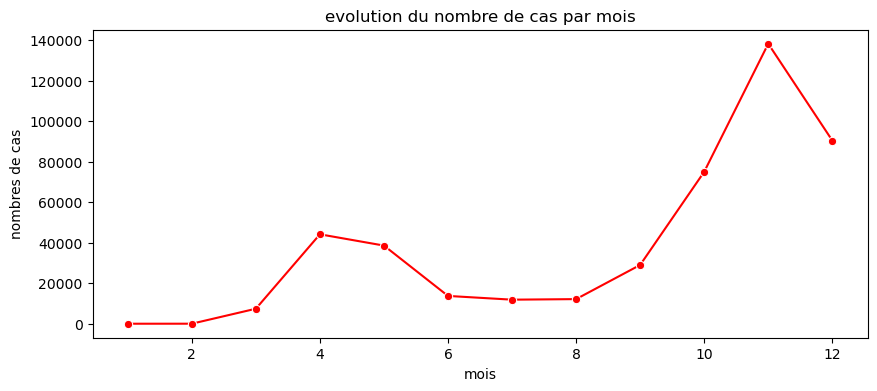

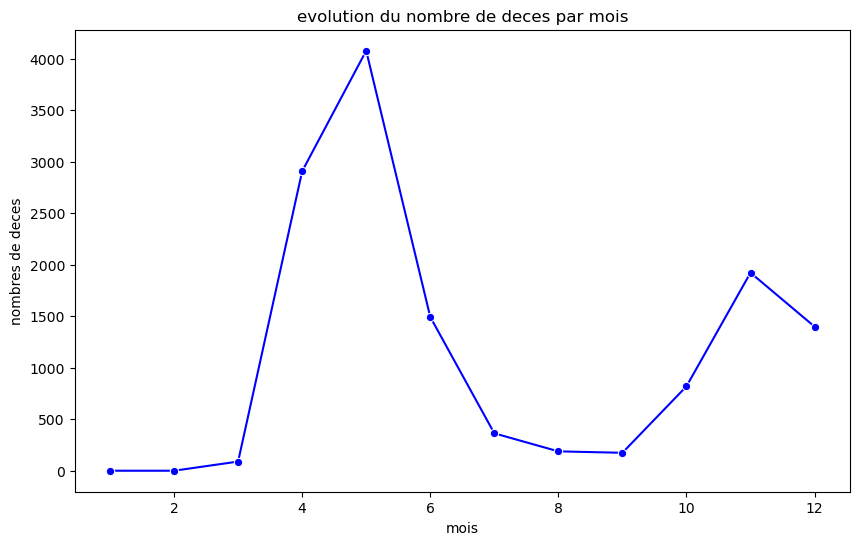

In [27]:
tendance("Canada")

<h4>France</h4>

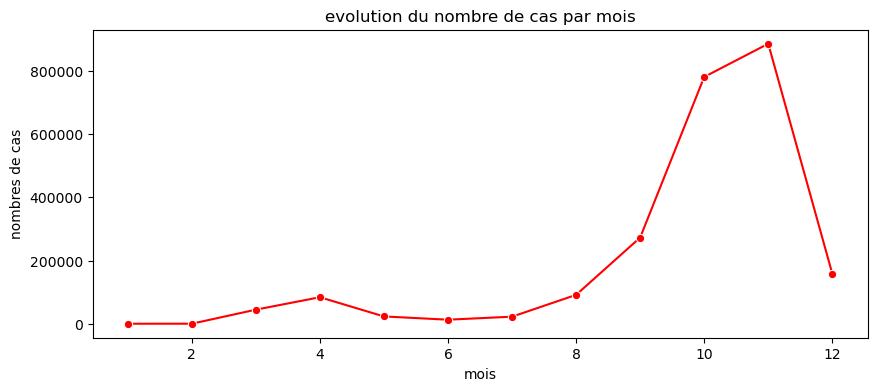

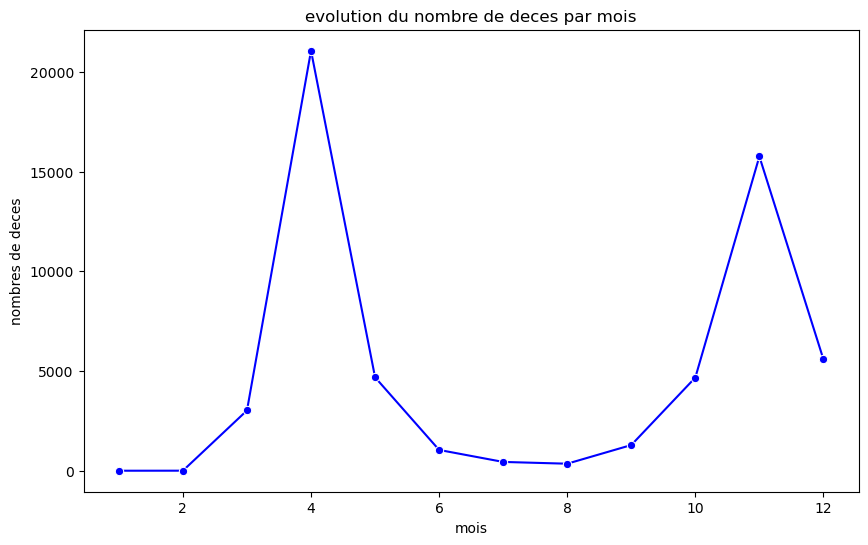

In [28]:
tendance("France")

<h4>Brésil</h4>

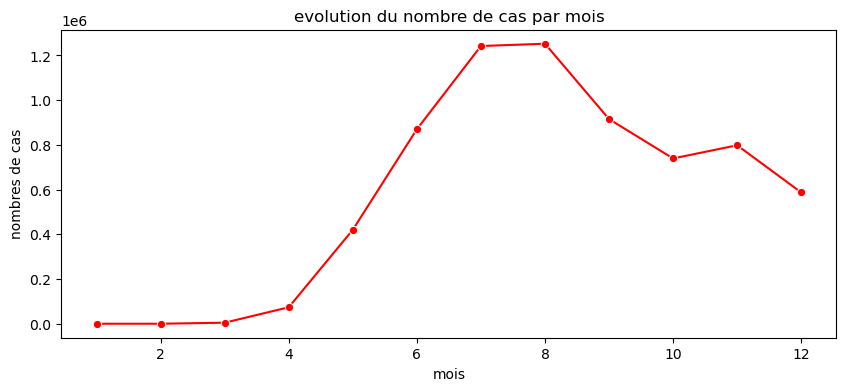

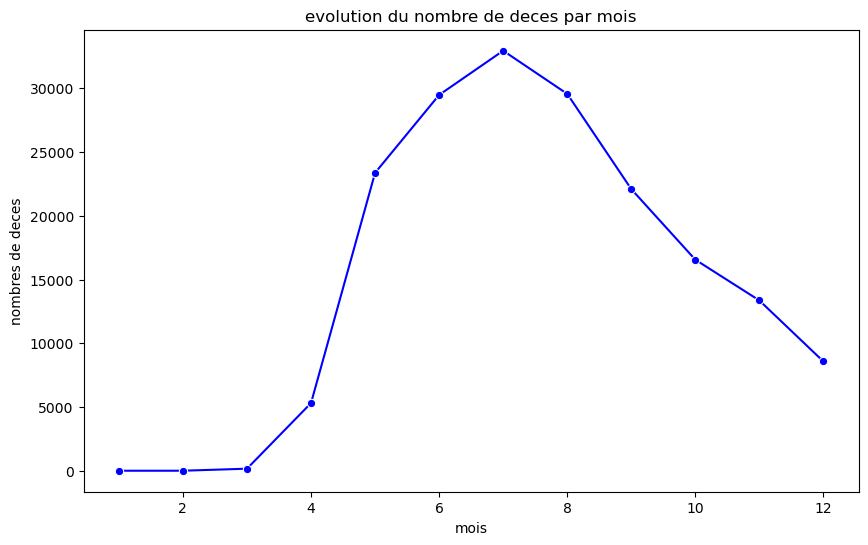

In [29]:
tendance("Brazil")

<h3>Existe t'il une corrélation entre le nombre de cas et le nombre de deces?</h3>
<p>c'est la question a la quelle nous essayerons de repondre ici,a travers 2 graphes: une <b>HeatMap</b> et un <b>Scatter Plot</b>

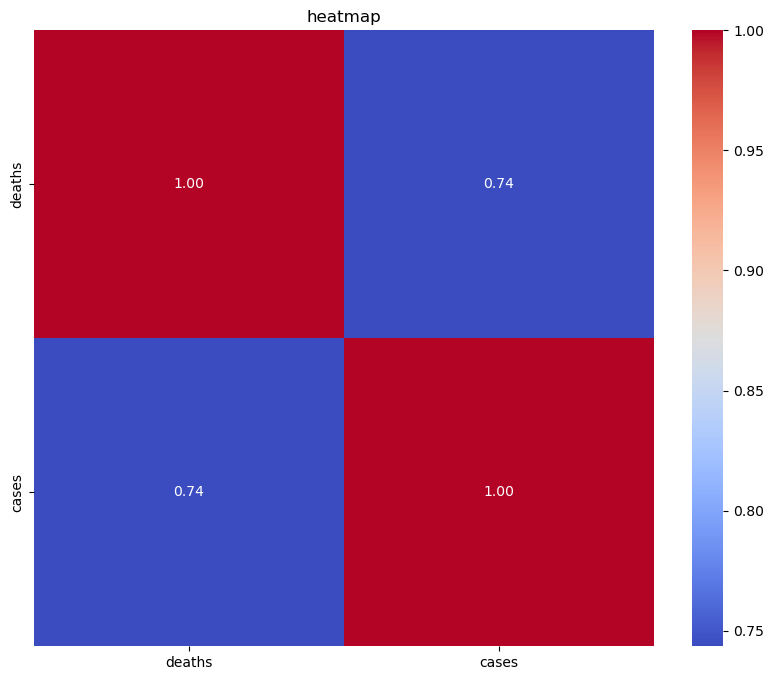

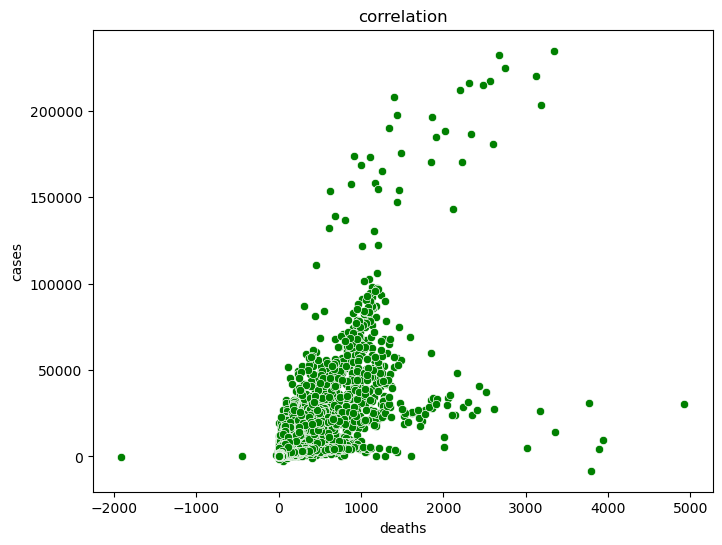

In [30]:
#HeatMap
plt.figure(figsize=(10, 8))
sns.heatmap(data[["deaths","cases"]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("heatmap")
plt.show()
#Scatter Plot(nuage de points)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="deaths", y="cases", data=data, color='green')
plt.title("correlation")
plt.xlabel("deaths")
plt.ylabel("cases")
plt.show()


<p>On arrive a le conclusion que oui,il existe une correlation assez forte entre le nombre de cas de maladie et le nombre de deces avec un coefficient de correlation de: <b>0,74</b></p>

<h2>Conclusion</h2>

<p>On conclusion on pourra dire que la repartition de la pandémie par pays et par continent,évaluer quel a été son ampleur et suivre son évolution dansle temps. Néanmoin,si nous possédions les données relative au periode confinement durant l'année 2020 dans chaque pays cela nous aurais permis d'étudier l'impact du confinement sur la propagation de la maladie,ce qui aurais enrichie d'avantage notre travail.</p>